<a id='overview'></a>

### Overview:


To have a commerically successful movie, a lot of factors can be considered varying from actor/director involved in making the film or a high budget fast paced movie to a well written script that keeps the audience engaged throughout but these factors does not necessarily have a high score in IMDB(Internet Movie Database). 

##### Dataset Description:

The dataset contains 28 variables for 5043 movies, spanning across 10 decades from different countries.“imdb_score” is the target/dependent variable while the other 27 variables are possible predictors.


##### Problem Statement: 

In this notebook, we will try to create predictive models and interpret them using an AutoML library called H20 



##### There are 12 categorical and 16 numerical data types. Below are the details:


In [ ]:


director_name           	Categorical
num_critic_for_reviews  	Numerical
gross                   	Numerical
num_user_for_reviews    	Numerical
imdb_score              	Numerical
num_voted_users         	Numerical
director_facebook_likes 	Numerical
actor_3_facebook_likes  	Numerical
actor_1_facebook_likes  	Numerical
country                 	Categorical
content_rating          	Categorical
title_year              	Numerical
actor_2_facebook_likes  	Numerical
aspect_ratio            	Numerical
movie_title             	Categorical
cast_total_facebook_likes	Numerical
actor_3_name            	Categorical
facenumber_in_poster    	Numerical
plot_keywords           	Categorical
movie_imdb_link         	Categorical
Color                   	Categorical
duration                	Numerical
actor_2_name            	Categorical
genres                  	Categorical
language                	Categorical
budget                  	Numerical
movie_facebook_likes    	Numerical
actor_1_name            	Categorical



###### Installing AUTOML library h20 to create predictive models and interpret them

In [3]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.4 MB 49 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=17b70496f54c64253a0c01c849f3e8349a20470dab8577eb2879ab3431574eae
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [4]:
 import h2o
 ##Importing h20 library 

In [5]:
h2o.init()
##initializing h20 instance

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjf4fxpa4
  JVM stdout: /tmp/tmpjf4fxpa4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjf4fxpa4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 hours and 30 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_z4ejsw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML
# import autoML from H2O

In [9]:
from google.colab import drive
# import dataset from google drive to run the code on google collab

In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
churn_df = h2o.import_file('/content/drive/MyDrive/AutoML/movie_metadata.csv')
#import dataset from google drive

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
churn_df.types
#print columns and its datatypes

{'color': 'enum',
 'director_name': 'enum',
 'num_critic_for_reviews': 'int',
 'duration': 'int',
 'director_facebook_likes': 'int',
 'actor_3_facebook_likes': 'int',
 'actor_2_name': 'enum',
 'actor_1_facebook_likes': 'int',
 'gross': 'int',
 'genres': 'enum',
 'actor_1_name': 'enum',
 'movie_title': 'string',
 'num_voted_users': 'int',
 'cast_total_facebook_likes': 'int',
 'actor_3_name': 'enum',
 'facenumber_in_poster': 'int',
 'plot_keywords': 'string',
 'movie_imdb_link': 'string',
 'num_user_for_reviews': 'int',
 'language': 'enum',
 'country': 'enum',
 'content_rating': 'enum',
 'budget': 'int',
 'title_year': 'int',
 'actor_2_facebook_likes': 'int',
 'imdb_score': 'real',
 'aspect_ratio': 'real',
 'movie_facebook_likes': 'int'}

In [13]:
#check data from data the data set.
churn_df.describe()

Rows:5043
Cols:28

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
type,enum,enum,int,int,int,int,enum,int,int,enum,enum,string,int,int,enum,int,string,string,int,enum,enum,enum,int,int,int,real,real,int
mins,,,1.0,7.0,0.0,0.0,,0.0,162.0,,,NaN,5.0,0.0,,0.0,NaN,NaN,1.0,,,,218.0,1916.0,0.0,1.6,1.18,0.0
mean,,,140.19427198077312,107.20107398568021,686.5092123911725,645.0097609561753,,6560.047061159649,48468407.52680932,,,NaN,83668.16081697402,9699.06385088241,,1.3711729622266402,NaN,NaN,272.7708084428514,,,,39752620.43638762,2002.4705167173245,1651.7544731610335,6.4421376164981154,2.2204030547305904,7525.9645052548085
maxs,,,813.0,511.0,23000.0,23000.0,,640000.0,760505847.0,,,NaN,1689764.0,656730.0,,43.0,NaN,NaN,5060.0,,,,12215500000.0,2016.0,137000.0,9.5,16.0,349000.0
sigma,,,121.6016753962313,25.1974408088242,2813.3286068656744,1665.0417284458586,,15020.759119984084,68452990.43875284,,,NaN,138485.25680596245,18163.79912404591,,2.013575919996105,NaN,NaN,377.9828855657686,,,,206114898.44868666,12.474598919270653,4042.4388626418727,1.1251158657328193,1.3851125353032794,19320.445109946584
zeros,,,0,0,907,89,,26,0,,,0,0,33,,2152,0,0,0,,,,0,0,55,0,0,2181
missing,19,104,50,15,104,23,13,7,884,0,7,0,0,0,23,13,153,0,21,12,5,303,492,108,13,0,329,0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868.0,11700.0,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0



##### Splitting the dataset into 70-15-15% and allocating 70% data to Training set and 15% data to test and validation sets.


In [18]:


churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [19]:
churn_train

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054,English,USA,PG-13,2.37e+08,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,3.09404e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238,English,USA,PG-13,3e+08,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,2.00074e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994,English,UK,PG-13,2.45e+08,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,4.48131e+08,Action|Thriller,Tom Hardy,The Dark Knight Rises,1.14434e+06,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701,English,USA,PG-13,2.5e+08,2012,23000,8.5,2.35,164000
,Doug Walker,nan,nan,131,nan,Rob Walker,131,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,,0,,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,nan,,,,nan,nan,12,7.1,nan,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,7.30587e+07,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738,English,USA,PG-13,2.637e+08,2012,632,6.6,2.35,24000
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,4.58992e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4,artificial intelligence|based on comic book|captain america|marvel cinematic universe|superhero,http://www.imdb.com/title/tt2395427/?ref_=fn_tt_tt_1,1117,English,USA,PG-13,2.5e+08,2015,21000,7.5,2.35,118000
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,3.01957e+08,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_tt_tt_1,973,English,UK,PG,2.5e+08,2009,11000,7.5,2.35,10000
Color,Zack Snyder,673,183,0,2000,Lauren Cohan,15000,3.30249e+08,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0,based on comic book|batman|sequel to a reboot|superhero|superman,http://www.imdb.com/title/tt2975590/?ref_=fn_tt_tt_1,3018,English,USA,PG-13,2.5e+08,2016,4000,6.9,2.35,197000
Color,Gore Verbinski,313,151,563,1000,Orlando Bloom,40000,4.23033e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,522040,48486,Jack Davenport,2,box office hit|giant squid|heart|liar's dice|monster,http://www.imdb.com/title/tt0383574/?ref_=fn_tt_tt_1,1832,English,USA,PG-13,2.25e+08,2006,5000,7.3,2.35,5000


#### Setting "imdb_score" as the predictor and the setting the rest of the columns as features.

In [20]:
y = "imdb_score"
x = churn_df.columns
x.remove(y)

As AutoML function automates the supervised machine learning model training process and finds the best model, given a training  and testing data set, and returns a leaderboard of all the models that were trained in the process, ranked by a default model performance metric. We will build 10 models in an AutoML run excluding the Stacked Ensemble models to ensure AutoML reproducibility so that it is not constrained by a time limit. Then, we will set nfolds to 0 for disabling cross-validation and Stacked Ensemble which was exclude using parameter 'exclude_algos'. 

In [23]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0)

Now, we will train the split data sets to get a leaderboard of the automl models and get a prediction for our predictor.

In [24]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
04:16:25.230: Project: AutoML_1_20221028_41625
04:16:25.232: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:16:25.234: Setting stopping tolerance adaptively based on the training frame: 0.016809690554095334
04:16:25.237: Build control seed: 10
04:16:25.238: training frame: Frame key: AutoML_1_20221028_41625_training_py_6_sid_9445    cols: 28    rows: 3539  chunks: 8    size: 1840103  checksum: 5890844438860915361
04:16:25.239: validation frame: Frame key: py_8_sid_9445    cols: 28    rows: 749  chunks: 8    size: 1308455  checksum: -7854638226286567054
04:16:25.243: leaderboard frame: Frame key: py_8_sid_9445    cols: 28    rows: 749  chunks: 8    size: 1308455  checksum: -7854638226286567054
04:16:25.244: blending frame: NULL
04:16:25.247: response column: imdb_score
04:16:25.247: fold column: null
04:16:25.247: weights column: null
04:16:25.279: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20221028_41625


Model Summary: 
    number_of_trees
--  -----------------
    65

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.24031950098875918
RMSE: 0.4902239294330288
MAE: 0.3654180814331283
RMSLE: 0.0788808747670644
Mean Residual Deviance: 0.24031950098875918

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.5909556418610509
RMSE: 0.7687363929599346
MAE: 0.5529832917953206
RMSLE: 0.11608541366247715
Mean Residual Deviance: 0.5909556418610509

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2022-10-28 04:17:08  0.003 sec   0                  6.04069          5.93541         36.4899              6.13828            6.03672           37.6785
    2022-10-28 04:17:09  0.229 sec   5                  1.30191          1.15855         1.69497              1.39632            1.23292           1.94971
    2022-10-28 04:17:09  0.359 sec   10                 0.738461         0.571452        0.545325             0.853156           0.64759           0.727875
    2022-10-28 04:17:09  0.485 sec   15                 0.679509         0.503994        0.461732             0.808651           0.590672          0.653916
    2022-10-28 04:17:09  0.624 sec   20                 0.641802         0.47295         0.411909             0.798115           0.576788          0.636987
    2022-10-28 04:17:09  0.768 sec   25                 0.621068         0.459022        0.385725             0.789026           0.569832          0.622563
    2022-10-28 04:17:09  0.904 sec   30                 0.595017         0.439709        0.354045             0.784058           0.564655          0.614747
    2022-10-28 04:17:09  1.049 sec   35                 0.576583         0.425575        0.332448             0.785842           0.564286          0.617548
    2022-10-28 04:17:10  1.198 sec   40                 0.552557         0.409642        0.305319             0.780944           0.562132          0.609874
    2022-10-28 04:17:10  1.341 sec   45                 0.530145         0.393104        0.281054             0.778562           0.560058          0.606158
    2022-10-28 04:17:10  1.483 sec   50                 0.519834         0.384888        0.270227             0.774355           0.557506          0.599626
    2022-10-28 04:17:10  1.623 sec   55                 0.513113         0.380915        0.263285             0.775007           0.556993          0.600636
    2022-10-28 04:17:10  1.764 sec   60                 0.506287         0.375604        0.256326             0.775478           0.556503          0.601367
    2022-10-28 04:17:10  1.922 sec   65                 0.490224         0.365418        0.24032              0.768736           0.552983          0.590956

Variable Importances: 
variable                            relative_importance    scaled_importance      percentage
----------------------------------  ---------------------  ---------------------  ----------------------
num_voted_users                     1195.9368896484375     1.0                    0.21283663928075242
duration                            630.9261474609375      0.5275580617355211     0.11228368488525602
title_year                          573.0008544921875      0.4791229867159873     0.10197492629478731
movie_facebook_likes                343.5776062011719      0.28728740552703524    0.06114528590006084
budget                              338.7086486816406      0.28321615598061267    0.06027877482892696
gross                               270.4410705566406      0.22613322901690958    0.04812943649366375
num_user_for_reviews                265

From the output, we could see that the constant and bad columns are being dropped which are movie_title, plot_keywords and movie_imdb_link and the best model seems to be XGBoost as it has the least root mean squared error, mean aggreated error, mean squared error and mean residual deviance as compared to other models which were trained. To further check which model of XGBoost was the most optimal, we will check the leaderboard and compare it with different models for the same algorithm.

In [25]:
lb = aml.leaderboard

In [26]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_3_AutoML_1_20221028_41625,0.768736,0.590956,0.552983,0.116085,0.590956
XGBoost_2_AutoML_1_20221028_41625,0.810873,0.657514,0.579544,0.121883,0.657514
XGBoost_1_AutoML_1_20221028_41625,0.817558,0.668401,0.581834,0.122302,0.668401
GBM_4_AutoML_1_20221028_41625,0.825754,0.68187,0.569652,0.126176,0.68187
GBM_2_AutoML_1_20221028_41625,0.831898,0.692054,0.570832,0.127055,0.692054
XRT_1_AutoML_1_20221028_41625,0.832095,0.692383,0.610811,0.125334,0.692383
DRF_1_AutoML_1_20221028_41625,0.833465,0.694663,0.581029,0.126734,0.694663
GBM_3_AutoML_1_20221028_41625,0.833864,0.69533,0.5728,0.127254,0.69533
GBM_1_AutoML_1_20221028_41625,0.848906,0.720641,0.588957,0.129244,0.720641
GLM_1_AutoML_1_20221028_41625,0.852669,0.727045,0.627221,0.127853,0.727045


The output of the leaderboard clearly indicates that the "XGBoost_3_AutoML_1_20221028_41625" model is the best among other models for training and validation data sets.

In [27]:
churn_pred=aml.leader.predict(churn_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [28]:
churn_pred.head()

predict
6.3991
6.63363
5.91438
6.70034
6.18514
6.94547
6.41696
7.42676
5.58239
7.4383


Checking the performance for the same model on test data set we can see that the values for mse, rmse, mae and mean residual deviance are pretty close to training and validation sets.

In [29]:
aml.leader.model_performance(churn_test)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.5915456898912471
RMSE: 0.7691200750801185
MAE: 0.549590231409136
RMSLE: 0.12105639627116238
Mean Residual Deviance: 0.5915456898912471

In [30]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [31]:
model_ids

['XGBoost_3_AutoML_1_20221028_41625',
 'XGBoost_2_AutoML_1_20221028_41625',
 'XGBoost_1_AutoML_1_20221028_41625',
 'GBM_4_AutoML_1_20221028_41625',
 'GBM_2_AutoML_1_20221028_41625',
 'XRT_1_AutoML_1_20221028_41625',
 'DRF_1_AutoML_1_20221028_41625',
 'GBM_3_AutoML_1_20221028_41625',
 'GBM_1_AutoML_1_20221028_41625',
 'GLM_1_AutoML_1_20221028_41625']

In [32]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20221028_41625


Model Summary: 
    number_of_trees
--  -----------------
    65

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.24031950098875918
RMSE: 0.4902239294330288
MAE: 0.3654180814331283
RMSLE: 0.0788808747670644
Mean Residual Deviance: 0.24031950098875918

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.5909556418610509
RMSE: 0.7687363929599346
MAE: 0.5529832917953206
RMSLE: 0.11608541366247715
Mean Residual Deviance: 0.5909556418610509

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2022-10-28 04:17:08  0.003 sec   0                  6.04069          5.93541         36.4899              6.13828            6.03672           37.6785
    2022-10-28 04:17:09  0.229 sec   5                  1.30191          1.15855         1.69497              1.39632            1.23292           1.94971
    2022-10-28 04:17:09  0.359 sec   10                 0.738461         0.571452        0.545325             0.853156           0.64759           0.727875
    2022-10-28 04:17:09  0.485 sec   15                 0.679509         0.503994        0.461732             0.808651           0.590672          0.653916
    2022-10-28 04:17:09  0.624 sec   20                 0.641802         0.47295         0.411909             0.798115           0.576788          0.636987
    2022-10-28 04:17:09  0.768 sec   25                 0.621068         0.459022        0.385725             0.789026           0.569832          0.622563
    2022-10-28 04:17:09  0.904 sec   30                 0.595017         0.439709        0.354045             0.784058           0.564655          0.614747
    2022-10-28 04:17:09  1.049 sec   35                 0.576583         0.425575        0.332448             0.785842           0.564286          0.617548
    2022-10-28 04:17:10  1.198 sec   40                 0.552557         0.409642        0.305319             0.780944           0.562132          0.609874
    2022-10-28 04:17:10  1.341 sec   45                 0.530145         0.393104        0.281054             0.778562           0.560058          0.606158
    2022-10-28 04:17:10  1.483 sec   50                 0.519834         0.384888        0.270227             0.774355           0.557506          0.599626
    2022-10-28 04:17:10  1.623 sec   55                 0.513113         0.380915        0.263285             0.775007           0.556993          0.600636
    2022-10-28 04:17:10  1.764 sec   60                 0.506287         0.375604        0.256326             0.775478           0.556503          0.601367
    2022-10-28 04:17:10  1.922 sec   65                 0.490224         0.365418        0.24032              0.768736           0.552983          0.590956

Variable Importances: 
variable                            relative_importance    scaled_importance      percentage
----------------------------------  ---------------------  ---------------------  ----------------------
num_voted_users                     1195.9368896484375     1.0                    0.21283663928075242
duration                            630.9261474609375      0.5275580617355211     0.11228368488525602
title_year                          573.0008544921875      0.4791229867159873     0.10197492629478731
movie_facebook_likes                343.5776062011719      0.28728740552703524    0.06114528590006084
budget                              338.7086486816406      0.28321615598061267    0.06027877482892696
gross                               270.4410705566406      0.22613322901690958    0.04812943649366375
num_user_for_reviews                265

In [33]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])


In [34]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20221028_41625',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20221028_41625'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221028_41625_training_py_6_sid_9445',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221028_41625_training_py_6_sid_9445'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221028_41625_training_py_6_sid_9445',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221028_41625_training_py_6_sid_9445'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type

Converting H20XGBoost to native XGBoost with the same H2OFrame as input earlier 

In [35]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'reg:squarederror',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 10000)

In [36]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20221028_41625


Model Summary: 
    number_of_trees
--  -----------------
    65

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.24031950098875918
RMSE: 0.4902239294330288
MAE: 0.3654180814331283
RMSLE: 0.0788808747670644
Mean Residual Deviance: 0.24031950098875918

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.5909556418610509
RMSE: 0.7687363929599346
MAE: 0.5529832917953206
RMSLE: 0.11608541366247715
Mean Residual Deviance: 0.5909556418610509

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2022-10-28 04:17:08  0.003 sec   0                  6.04069          5.93541         36.4899              6.13828            6.03672           37.6785
    2022-10-28 04:17:09  0.229 sec   5                  1.30191          1.15855         1.69497              1.39632            1.23292           1.94971
    2022-10-28 04:17:09  0.359 sec   10                 0.738461         0.571452        0.545325             0.853156           0.64759           0.727875
    2022-10-28 04:17:09  0.485 sec   15                 0.679509         0.503994        0.461732             0.808651           0.590672          0.653916
    2022-10-28 04:17:09  0.624 sec   20                 0.641802         0.47295         0.411909             0.798115           0.576788          0.636987
    2022-10-28 04:17:09  0.768 sec   25                 0.621068         0.459022        0.385725             0.789026           0.569832          0.622563
    2022-10-28 04:17:09  0.904 sec   30                 0.595017         0.439709        0.354045             0.784058           0.564655          0.614747
    2022-10-28 04:17:09  1.049 sec   35                 0.576583         0.425575        0.332448             0.785842           0.564286          0.617548
    2022-10-28 04:17:10  1.198 sec   40                 0.552557         0.409642        0.305319             0.780944           0.562132          0.609874
    2022-10-28 04:17:10  1.341 sec   45                 0.530145         0.393104        0.281054             0.778562           0.560058          0.606158
    2022-10-28 04:17:10  1.483 sec   50                 0.519834         0.384888        0.270227             0.774355           0.557506          0.599626
    2022-10-28 04:17:10  1.623 sec   55                 0.513113         0.380915        0.263285             0.775007           0.556993          0.600636
    2022-10-28 04:17:10  1.764 sec   60                 0.506287         0.375604        0.256326             0.775478           0.556503          0.601367
    2022-10-28 04:17:10  1.922 sec   65                 0.490224         0.365418        0.24032              0.768736           0.552983          0.590956

Variable Importances: 
variable                            relative_importance    scaled_importance      percentage
----------------------------------  ---------------------  ---------------------  ----------------------
num_voted_users                     1195.9368896484375     1.0                    0.21283663928075242
duration                            630.9261474609375      0.5275580617355211     0.11228368488525602
title_year                          573.0008544921875      0.4791229867159873     0.10197492629478731
movie_facebook_likes                343.5776062011719      0.28728740552703524    0.06114528590006084
budget                              338.7086486816406      0.28321615598061267    0.06027877482892696
gross                               270.4410705566406      0.22613322901690958    0.04812943649366375
num_user_for_reviews                265

Even with the native XGBoost, we could the model performing well with similar value for mse, rmse, mae and mean residual deviance. For prediction of the imdb movie score from all the models which were tested, the feature "num_voted_users" is the most significant for prediction following "duration" and "title_year features" which has been s

In [37]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

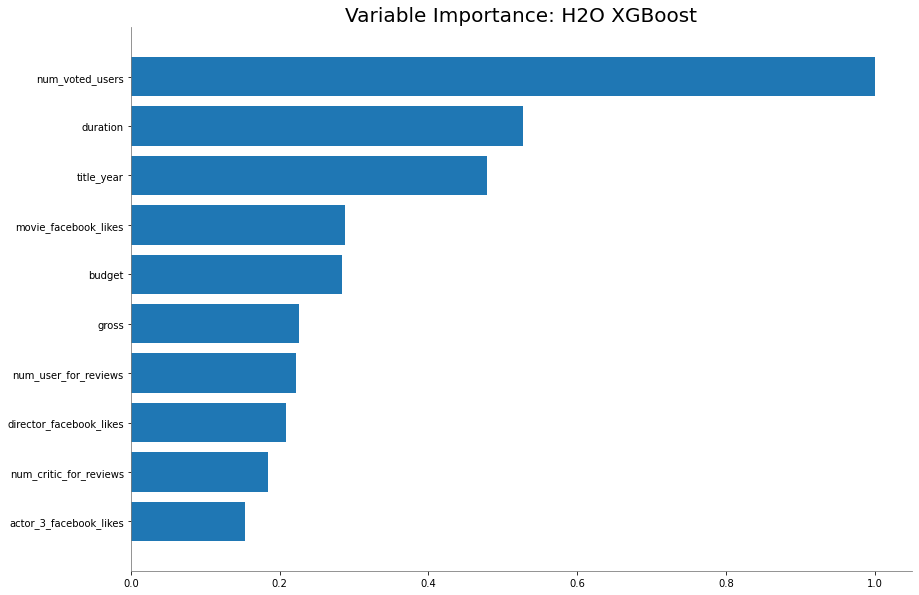

<Figure size 432x288 with 0 Axes>

In [39]:
out.varimp_plot()

Similarly, on building and plotting the predictors using gradient boosting machine, we see that "num_voted_users" is the most significant for prediction followed by "duration" and "title_year features".



##### Is the relationship significant?
The relation for each algorithm does not seem to be significant between the different automl models that were trained except for the best model which was for XGBoost and generalized linear model (GLM).   

##### Are any model assumptions violated?
No, all models are valid and their predictions are more or less the same.

##### Is there any multicollinearity in the model?
Yes, there is multicollinearity in the model as predictor variables does not seem to be indepedent of all the other predictor variables as few variables like gross, num_user_for_reviews and director_facebook_likes of the movie shows multi collinearity as it has the same variable importance which can be seen using the variable importance plot.

##### In the multivariate models are predictor variables independent of all the other predictor variables?
Yes, number of voted users seems to be independent of any other feature.

##### In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
"num_voted_users" is the most significant for prediction followed by "duration" and "title_year features" . Whereas movie_title, plot_keywords and movie_imdb_link were excluded as it was considered insignificant while training the models using the split dataset. 


##### Does the model make sense?
Yes, after removing the insignificant predictor variables, the trained model and validated models makes complete sense. 

##### Does regularization help?
Yes. Using subset selection approach for regularization, variables such as movie_title, plot_keywords and movie_imdb_link were excluded and the rest of the variables were selected as a subset of predictors that seems to be related to the depedent variable.


##### Which independent variables are significant?
Duration of the movie and the number of voted users are the significant independent variables.

##### Which hyperparameters are important?
max_models, seed, exclude_algos, verbosity and nfolds were important hyperparameters for the model as we built 10 models in an AutoML run excluding the Stacked Ensemble models to ensure AutoML reproducibility so that it is not constrained by a time limit. Then, we set nfolds to 0 for disabling cross-validation and Stacked Ensemble which was exclude using parameter 'exclude_algos'. These helped with the improving the performance of the model significantly.

#### References

[1] https://www.youtube.com/watch?v=91QljBnvM7s
[2] https://docs.h2o.ai/h2o/latest-stable/h2o-docs/flow.html
[3] https://www.geeksforgeeks.org/automl-using-h2o/
[4] https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
[5] https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook